In [1]:
import numpy as np
import pandas as pd

In [2]:
import pandas as pd

filepath_dict = {'yelp':   'yelp_labelled.txt',
                 'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
df

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,imdb
744,"Unfortunately, any virtue in this film's produ...",0,imdb
745,"In a word, it is embarrassing.",0,imdb
746,Exceptionally bad!,0,imdb


In [3]:
df["sentence"] = df["sentence"].str.lower()
df["sentence"].shape

(2748,)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [5]:
X = cv.fit_transform(df["sentence"]).toarray()

In [6]:
Y = df["label"]

In [24]:
voc_size = len(cv.vocabulary_)
voc_size

5155

In [8]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=2)

In [9]:
xtrain.shape

(2198, 5155)

In [38]:
sent_size = len(xtrain[0])
sent_size

5155

### Baseline_Model

#### Logistic_Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [11]:
lr.fit(xtrain,ytrain)
score = lr.score(xtrain,ytrain)
score

0.9799818016378526

In [12]:
lr.score(xtest,ytest)

0.8272727272727273

### RNN

In [32]:
from tensorflow.keras.layers import Dense,RNN,InputLayer,Embedding,SimpleRNN,LSTM

In [14]:
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential()

In [50]:
model.add(Embedding(input_dim=voc_size,output_dim=20,input_length=sent_size)) # input_dim and input_length same beacuse
                                                                              # they are count_vectorized
model.add(SimpleRNN(10))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 5155, 20)          103100    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 10)                310       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 103421 (403.99 KB)
Trainable params: 103421 (403.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(xtrain, ytrain,epochs=50,validation_data=(xtest,ytest))

Epoch 1/50
69/69 [==============================] - 118s 2s/step - loss: 0.6945 - accuracy: 0.4795 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/50
69/69 [==============================] - 120s 2s/step - loss: 0.6933 - accuracy: 0.5023 - val_loss: 0.6933 - val_accuracy: 0.4855
Epoch 3/50
 9/69 [==>...........................] - ETA: 1:41 - loss: 0.6922 - accuracy: 0.5417

In [ ]:
text = "i did not like the review"

bow_text = cv.transform([text]).toarray()

In [ ]:
bow_text

In [ ]:
model.predict(bow_text)

In [20]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

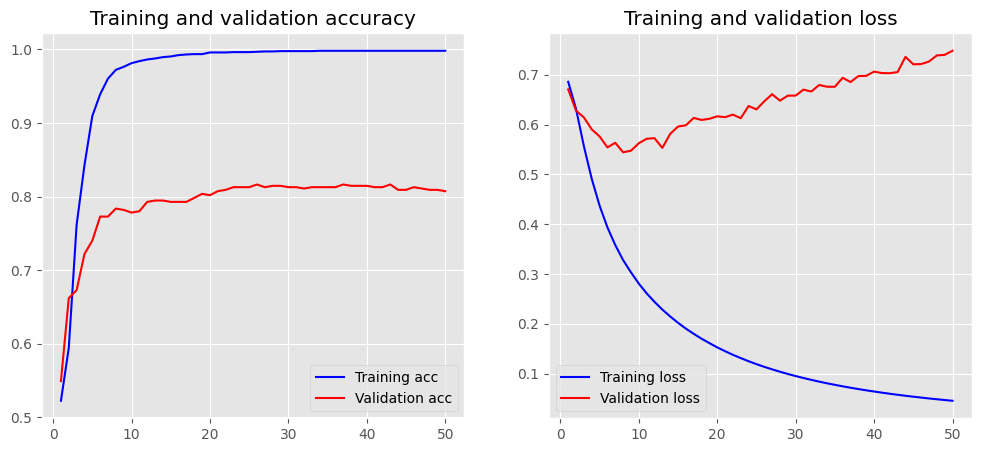

In [21]:
plot_history(history)